In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
data = "/kaggle/input/creditcardfraud/creditcard.csv"
df = pd.read_csv(data)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.duplicated().sum()

1081

In [14]:
df=df.drop_duplicates()

In [18]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [17]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

fraudulent transactions percentage(after removing duplicates) = 473/283726 = 0.167%

This value is elucidated in the description of the dataframe, as the unique values are 0 and 1, the mean is equal to the percentage of fraudulent transactions. Similarly, the average amount of fraudulent transactions is 88.47.

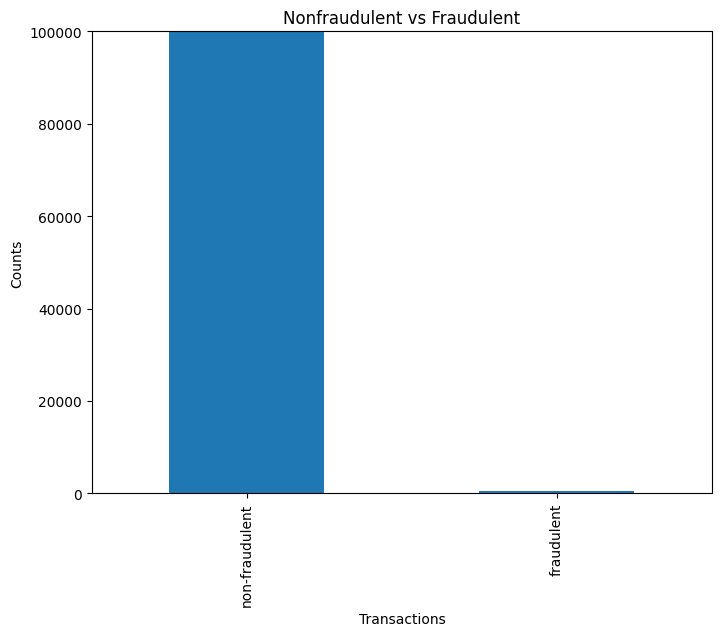

In [34]:
plt.figure(figsize=(8, 6)) 
df['Class'].value_counts().plot(kind='bar')

plt.title('Nonfraudulent vs Fraudulent')
plt.xlabel('Transactions')
plt.ylabel('Counts')
x_labels = [0,1]
x_labels = ['non-fraudulent' if x == 0 else 'fraudulent' for x in x_labels] 
plt.xticks(range(len(x_labels)), x_labels)
plt.ylim(0, 100000) 
plt.show()

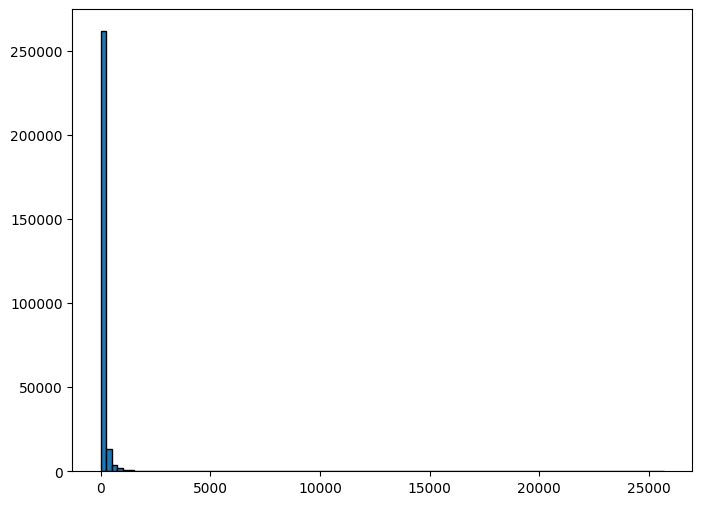

In [44]:
plt.figure(figsize=(8,6))
plt.hist(df['Amount'], bins=100, edgecolor='black') 
plt.show()

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, auc
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))
X = df.drop(columns=['Class',])
y = df['Class']
# Split the data into training, testing, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [50]:
# Initialize the models
log_reg = LogisticRegression()
xgb = XGBClassifier()

# Fit the models
log_reg.fit(X_train, y_train)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [52]:
from sklearn.metrics import accuracy_score
# Predict using the models
y_val_pred_log_reg = log_reg.predict(X_val)
y_test_pred_log_reg = log_reg.predict(X_test)
y_val_pred_xgb = xgb.predict(X_val)
y_test_pred_xgb = xgb.predict(X_test)

# Calculate accuracies
val_acc_log_reg = accuracy_score(y_val, y_val_pred_log_reg)
test_acc_log_reg = accuracy_score(y_test, y_test_pred_log_reg)
val_acc_xgb = accuracy_score(y_val, y_val_pred_xgb)
test_acc_xgb = accuracy_score(y_test, y_test_pred_xgb)

# Print accuracies
print(f"Logistic Regression - Validation Accuracy: {val_acc_log_reg:.2f}, Test Accuracy: {test_acc_log_reg:.2f}")
print(f"XGBoost - Validation Accuracy: {val_acc_xgb:.2f}, Test Accuracy: {test_acc_xgb:.2f}")

Logistic Regression - Validation Accuracy: 1.00, Test Accuracy: 1.00
XGBoost - Validation Accuracy: 1.00, Test Accuracy: 1.00


Test Classification Report LR:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56649
           1       0.91      0.53      0.67        97

    accuracy                           1.00     56746
   macro avg       0.95      0.76      0.83     56746
weighted avg       1.00      1.00      1.00     56746



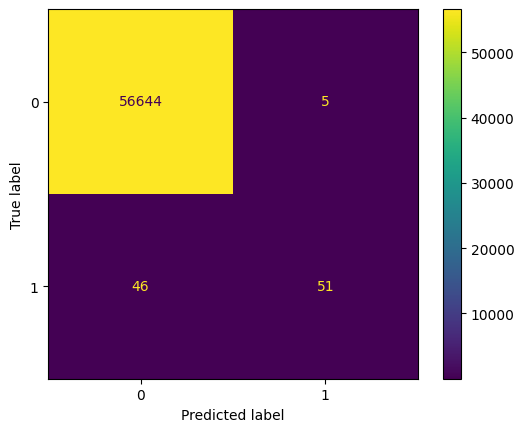

Val Classification Report LR:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56669
           1       0.82      0.61      0.70        76

    accuracy                           1.00     56745
   macro avg       0.91      0.80      0.85     56745
weighted avg       1.00      1.00      1.00     56745



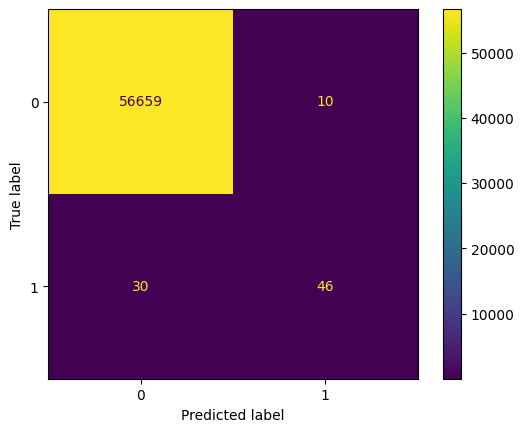

In [53]:
from sklearn import metrics

#print(f"Test Confusion Matrix LR: {confusion_matrix(y_test,y_test_pred_log_reg)}")
print(f"Test Classification Report LR: {classification_report(y_test,y_test_pred_log_reg)}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,y_test_pred_log_reg), display_labels = [0, 1])

cm_display.plot()
plt.show()
#print(f"Val Confusion Matrix LR: {confusion_matrix(y_val,y_val_pred_log_reg)}")
print(f"Val Classification Report LR: {classification_report(y_val, y_val_pred_log_reg)}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_val,y_val_pred_log_reg), display_labels = [0, 1])

cm_display.plot()
plt.show()

Test Classification Report XGB:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56649
           1       0.95      0.79      0.87        97

    accuracy                           1.00     56746
   macro avg       0.98      0.90      0.93     56746
weighted avg       1.00      1.00      1.00     56746



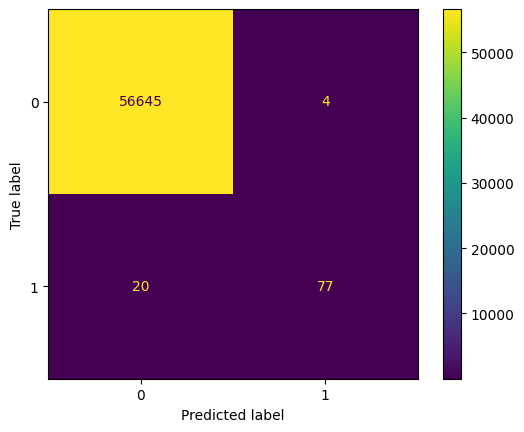

Val Classification Report XGB:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56669
           1       0.95      0.76      0.85        76

    accuracy                           1.00     56745
   macro avg       0.98      0.88      0.92     56745
weighted avg       1.00      1.00      1.00     56745



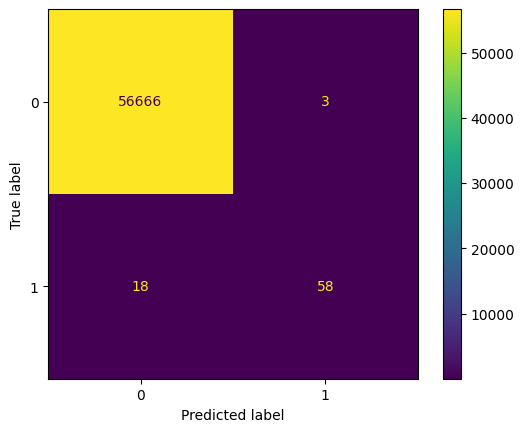

In [54]:
#print(f"Test Confusion Matrix LR: {confusion_matrix(y_test,y_test_pred_log_reg)}")
print(f"Test Classification Report XGB: {classification_report(y_test,y_test_pred_xgb)}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,y_test_pred_xgb), display_labels = [0, 1])

cm_display.plot()
plt.show()
#print(f"Val Confusion Matrix LR: {confusion_matrix(y_val,y_val_pred_log_reg)}")
print(f"Val Classification Report XGB: {classification_report(y_val, y_val_pred_xgb)}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_val,y_val_pred_xgb), display_labels = [0, 1])

cm_display.plot()
plt.show()